In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
#maximize the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

df = pd.read_csv("C:/Users/Home/Car_dekho/Car_Dheko/dropped_car_data_set.csv", low_memory=False)

In [4]:
df.shape

(8369, 48)

In [5]:
df.duplicated().sum()

np.int64(88)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

ft                        0
bt                        4
km                        0
transmission              0
ownerNo                   0
oem                       0
model                     0
centralVariantId          0
variantName               0
price                     0
Insurance Validity       56
Seats                    66
RTO                     905
Engine Displacement       0
Mileage                 284
Max Power               660
Torque                  668
Wheel Size             3218
Color                     3
Engine Type             290
Max Power_rpm           489
Max Torque              303
No of Cylinder           86
Values per Cylinder     315
Value Configuration    2225
Fuel Supply System     2570
Length                   79
Width                    83
Height                   83
Wheel Base              635
Front Tread            3946
Rear Tread             2561
Kerb Weight            3775
Gross Weight           6069
Gear Box                196
Drive Type          

In [8]:
def null_value_imputer(df):
    # Handling null values
    for i in df.columns:
        if (df[i].isnull().sum() / len(df)) * 100 >= 80:
            df.drop(i, axis=1, inplace=True)
        elif df[i].dtypes in ["int64", "float64"]:
            if df[i].skew() < 0.4 and df[i].skew() > -0.4:
                df[i].fillna(df[i].mean(), inplace=True)
            else:
                df[i].fillna(df[i].median(), inplace=True)
        else:
            df[i].fillna(df[i].mode()[0], inplace=True)

    print("Null values after imputation:\n", df.isnull().sum())


In [9]:
null_value_imputer(df)

Null values after imputation:
 ft                     0
bt                     0
km                     0
transmission           0
ownerNo                0
oem                    0
model                  0
centralVariantId       0
variantName            0
price                  0
Insurance Validity     0
Seats                  0
RTO                    0
Engine Displacement    0
Mileage                0
Max Power              0
Torque                 0
Wheel Size             0
Color                  0
Engine Type            0
Max Power_rpm          0
Max Torque             0
No of Cylinder         0
Values per Cylinder    0
Value Configuration    0
Fuel Supply System     0
Length                 0
Width                  0
Height                 0
Wheel Base             0
Front Tread            0
Rear Tread             0
Kerb Weight            0
Gross Weight           0
Gear Box               0
Drive Type             0
Steering Type          0
Turning Radius         0
Front Brake Type   

C:\Users\Home\AppData\Local\Temp\ipykernel_13436\703292552.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_13436\703292552.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [10]:
df.dtypes

ft                      object
bt                      object
km                       int64
transmission            object
ownerNo                  int64
oem                     object
model                   object
centralVariantId         int64
variantName             object
price                    int64
Insurance Validity      object
Seats                  float64
RTO                     object
Engine Displacement      int64
Mileage                float64
Max Power              float64
Torque                 float64
Wheel Size             float64
Color                   object
Engine Type             object
Max Power_rpm          float64
Max Torque             float64
No of Cylinder         float64
Values per Cylinder    float64
Value Configuration     object
Fuel Supply System      object
Length                 float64
Width                  float64
Height                 float64
Wheel Base             float64
Front Tread            float64
Rear Tread             float64
Kerb Wei

In [11]:
df = df.astype({'Seats': 'int', 'Wheel Size': 'int', 'Max Power_rpm': 'int', 'Max Torque': 'int', 'No of Cylinder': 'int',
                'Values per Cylinder': 'int', 'Length': 'int', 'Width': 'int', 'Height': 'int', 'Wheel Base': 'int', 'Front Tread': 'int', 
                'Rear Tread': 'int','Kerb Weight': 'int', 'Gross Weight': 'int', 'Alloy Wheel Size': 'int', 'No of Doors': 'int', 'Cargo Volume': 'int'})


In [12]:
df.dtypes

ft                      object
bt                      object
km                       int64
transmission            object
ownerNo                  int64
oem                     object
model                   object
centralVariantId         int64
variantName             object
price                    int64
Insurance Validity      object
Seats                    int64
RTO                     object
Engine Displacement      int64
Mileage                float64
Max Power              float64
Torque                 float64
Wheel Size               int64
Color                   object
Engine Type             object
Max Power_rpm            int64
Max Torque               int64
No of Cylinder           int64
Values per Cylinder      int64
Value Configuration     object
Fuel Supply System      object
Length                   int64
Width                    int64
Height                   int64
Wheel Base               int64
Front Tread              int64
Rear Tread               int64
Kerb Wei

In [13]:
df.shape

(8281, 48)

In [14]:
numeric_df = df.select_dtypes(exclude=['object'])  # Select only numeric columns

# Create an empty DataFrame to store the comparison table
comparison_table = pd.DataFrame()

# Loop through each numeric column and calculate the statistics
for col in numeric_df.columns:
    # Calculate statistics for each column
    mean_value = numeric_df[col].mean()
    median_value = numeric_df[col].median()
    mode_value = numeric_df[col].mode()[0]  # Get the first mode if multiple
    std_value = numeric_df[col].std()
    var_value = numeric_df[col].var()
    
    # Add the statistics to the comparison table
    comparison_table[col] = [mean_value, median_value, mode_value, std_value, var_value]

# Set the index to reflect the types of statistics
comparison_table.index = ['Mean', 'Median', 'Mode', 'Std', 'Variance']

# Transpose the table to have columns as rows for easier comparison
comparison_table = comparison_table.transpose()

# Display the comparison table
comparison_table
#here mean is more than median --> km, ownerNo, price, Seats, Engine Displacement, Mileage, Max power, Torque, Wheel size, height, length, wheel base, Frond Tread, 
#Rear Tread, kerb weight, gross weight, Turning Radius, Top speed, Alloy wheel size, cargo volume, car_age i.e. right skewed (postiviely skewed) affected large datasets
#here mean is less than median --> centralVariantId, Max power_rpm, Max Torque, No of cylinder, values per cylinder, width, Acceleration, No of doors i.e. left skewed (neg skewed) slightly affected datasets


,Mean,Median,Mode,Std,Variance
km,58970.734815,53700.00,120000.0,7.435738e+04,5.529019e+09
ownerNo,1.357324,1.00,1.0,6.379389e-01,4.069660e-01
centralVariantId,4965.956285,5327.00,10403.0,2.749260e+03,7.558432e+06
price,959565.677454,602000.00,650000.0,1.421871e+06,2.021716e+12
Seats,5.198285,5.00,5.0,6.505679e-01,4.232386e-01
Engine Displacement,0.891197,0.00,0.0,1.418774e+00,2.012919e+00
Mileage,19.234166,19.02,18.9,3.602057e+00,1.297482e+01
Max Power,102.527507,88.50,88.5,4.295307e+01,1.844966e+03
Torque,175.433543,140.00,140.0,1.022354e+02,1.045207e+04
Wheel Size,15.402608,15.00,15.0,1.202539e+00,1.446099e+00


In [16]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.5 MB 1.4 MB/s eta 0:00:32
   - -------------------------------------- 1.6/44.5 MB 2.5 MB/s eta 0:00:17
   --- ------------------------------------ 3.9/44.5 MB 5.0 MB/s eta 0:00:09
   ---- ----------------------------------- 5.2/44.5 MB 5.2 MB/s eta 0:00:08
   ------ --------------------------------- 7.1/44.5 MB 5.8 MB/s eta 0:00:07
   -------- ------------------------------- 9.2/44.5 MB 6.5 MB/s eta 0:00:06
   --------- ------------------------------ 11.0/44.5 MB 6.9 MB/s eta 0:00:05
   ----------- ---------------------------- 13.1/44.5 MB 7.1 MB/s eta 0:00:05
   ------------ --------------------------- 14.2/44.5 MB 6.9 MB/s eta 0:00:05
   -------------- ------------------------- 15.7/44.5 MB 7.0 MB/s eta 0:00:05
   -----

In [17]:
from scipy import stats

# Selected continuous data columns
num_col = ['km', 'price', 'Mileage', 'Max Power', 'Torque', 'Max Power_rpm', 'Max Torque', 'Length', 'Width', 'Height', 'Wheel Base',
           'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight', 'Top Speed', 'Cargo Volume']

# Removing outliers using Z-score method
def remove_outliers_zscore(df, threshold=3):
    for col in num_col:
        # Calculate Z-scores for each value in the column
        z_scores = np.abs(stats.zscore(df[col]))

        # Filter the data to remove rows with Z-scores greater than the threshold
        df = df[z_scores < threshold]
        
        print(f"Data after removing outliers in {col}:\n", df[col].describe())
        
    return df

# Example of calling the function
# Assuming df is your DataFrame
df = remove_outliers_zscore(df)
print(f"New shape after removing outliers: {df.shape}")


Data after removing outliers in km:
 count      8276.000000
mean      57740.651643
std       34246.478701
min           0.000000
25%       30000.000000
50%       53651.000000
75%       80000.000000
max      260000.000000
Name: km, dtype: float64
Data after removing outliers in price:
 count    8.124000e+03
mean     8.255292e+05
std      7.709630e+05
min      2.016100e+04
25%      3.950000e+05
50%      6.000000e+05
75%      9.160000e+05
max      5.200000e+06
Name: price, dtype: float64
Data after removing outliers in Mileage:
 count    8059.000000
mean       19.251546
std         3.398738
min         9.000000
25%        17.050000
50%        19.030000
75%        21.400000
max        28.400000
Name: Mileage, dtype: float64
Data after removing outliers in Max Power:
 count    7949.000000
mean       98.257861
std        33.047567
min        34.200000
25%        78.900000
50%        88.500000
75%       115.000000
max       212.550000
Name: Max Power, dtype: float64
Data after removing outlie

In [19]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 8.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 8.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.0 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.0 MB 3.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.0 MB 2.8 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.0 MB 3.0 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 3.1 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 3.3 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 3.3 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.3 MB/s eta 0:00:02
   --

In [20]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.select_dtypes(include="object").columns:
    df[i]=enc.fit_transform(df[i])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [22]:
# Set the style for the plots
sns.set(style="whitegrid")


# Box plot for 'price'
def plot_boxplot_price(df):
    plt.figure(figsize=(10, 4), 
                 layout='constrained')
    sns.boxplot(y=df['price'], color='lightgreen')
    plt.title('Box Plot of Car Prices')
    plt.ylabel('Price')
    plt.show()

# Histogram for 'Mileage'
def plot_histogram_mileage(df):
    plt.figure(figsize=(10, 4), 
                 layout='constrained')
    sns.histplot(df['Mileage'], bins=30, kde=True, color='red')
    plt.title('Histogram of Mileage')
    plt.xlabel('Mileage')
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot comparing two specific columns
def plot_scatter_comparison(df, x_column, y_column):
    plt.figure(figsize=(10, 4), 
                 layout='constrained')
    sns.scatterplot(x=df[x_column], y=df[y_column], alpha=0.7, color='purple')
    plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

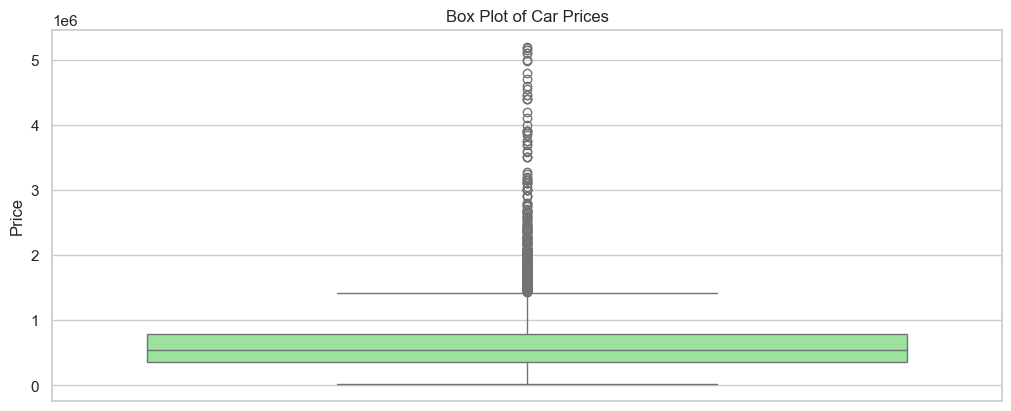

In [23]:
# Plot box plot for 'price'
plot_boxplot_price(df)

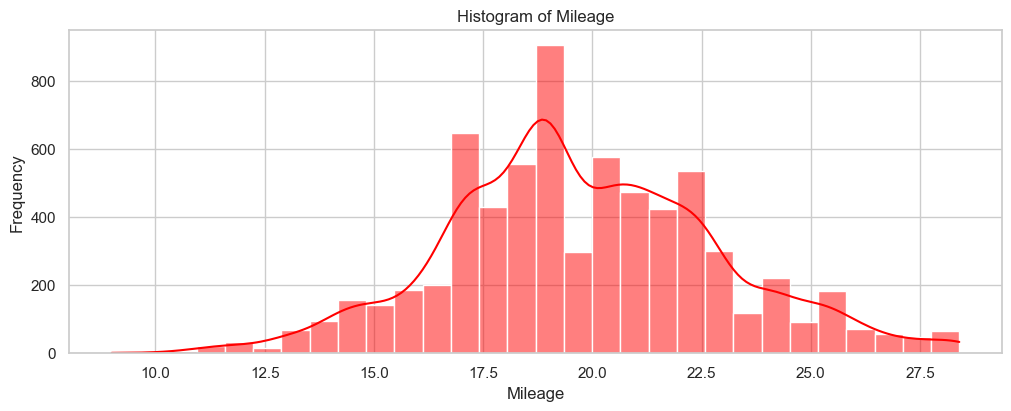

In [24]:
plot_histogram_mileage(df)

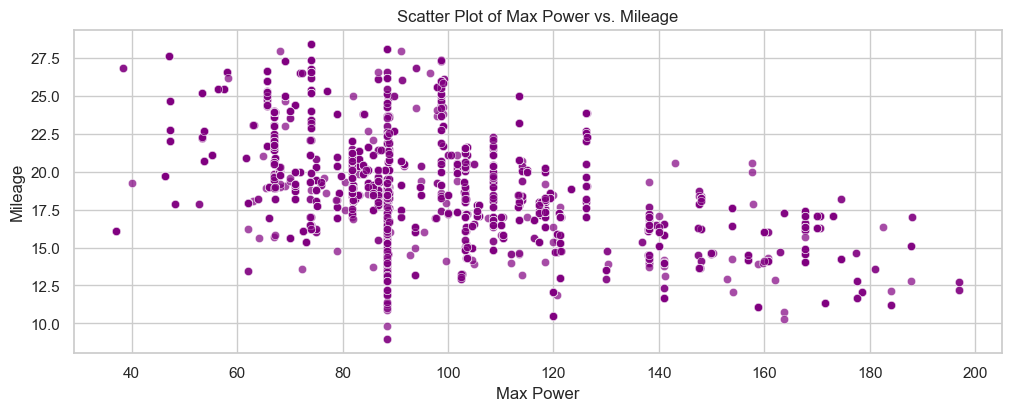

In [25]:
plot_scatter_comparison(df, 'Max Power', 'Mileage')

<Figure size 400x200 with 0 Axes>

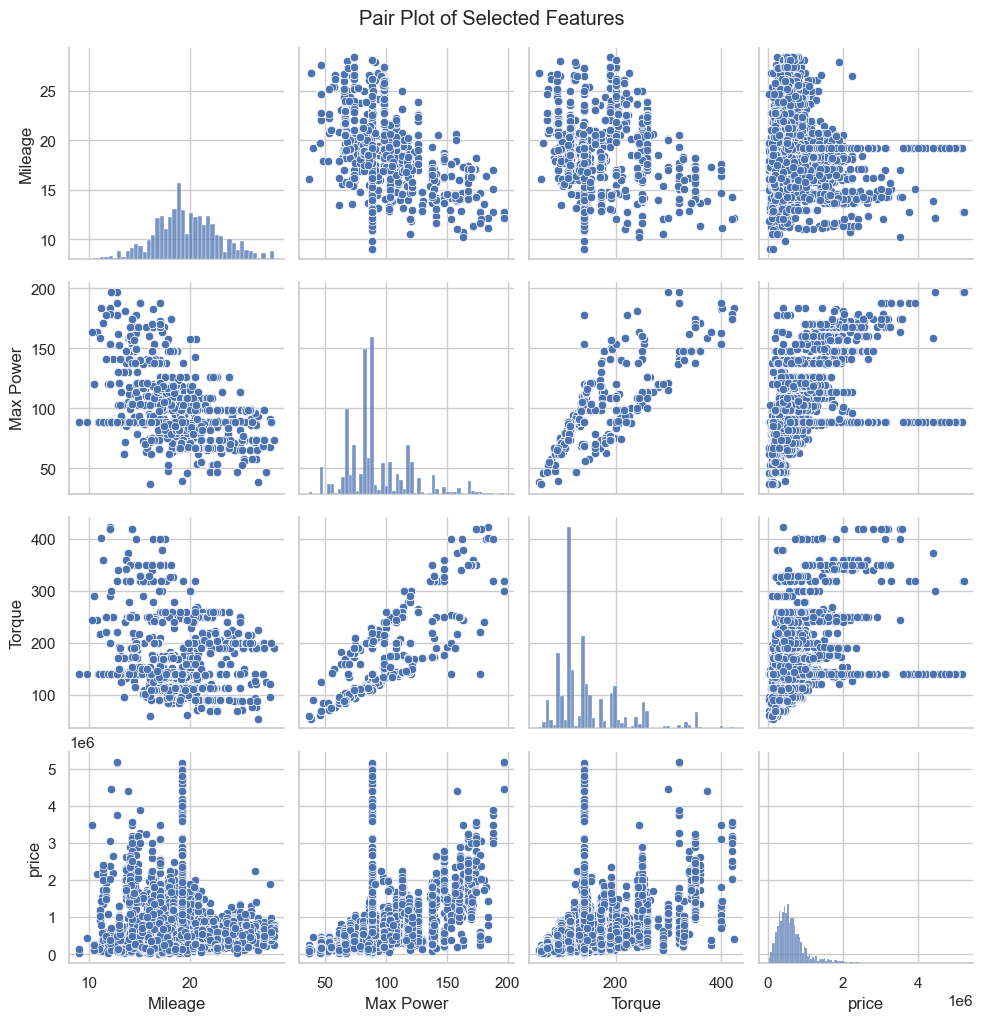

In [26]:
def plot_pairplot(df):
    plt.figure(figsize=(4, 2))
    sns.pairplot(df[['Mileage', 'Max Power', 'Torque', 'price']])
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.show()

# Plot pair plot
plot_pairplot(df)

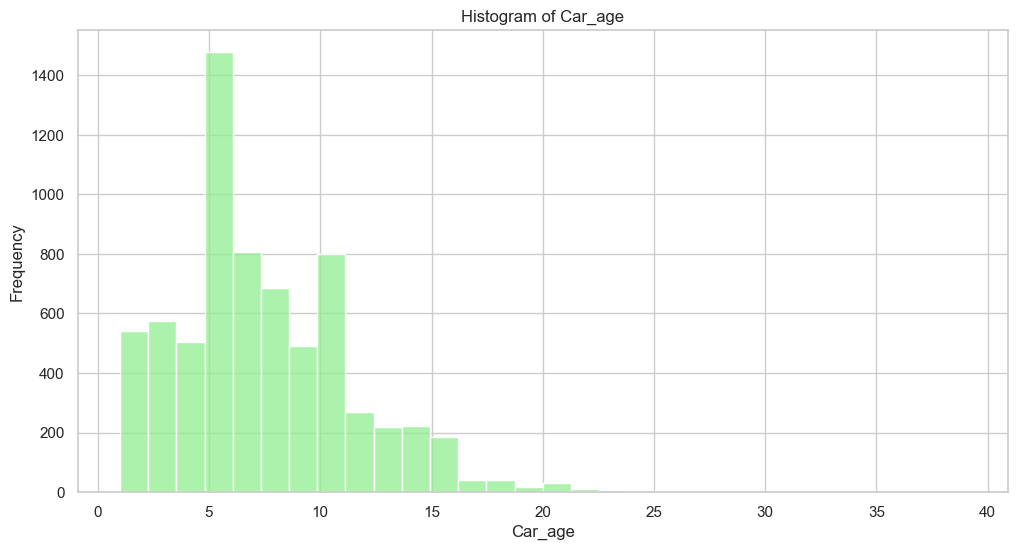

In [27]:
def plot_histogram(df, column_name, bins=30):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column_name], bins=bins, kde=False, color='lightgreen')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example histogram for 'car_age'
plot_histogram(df, 'Car_age')

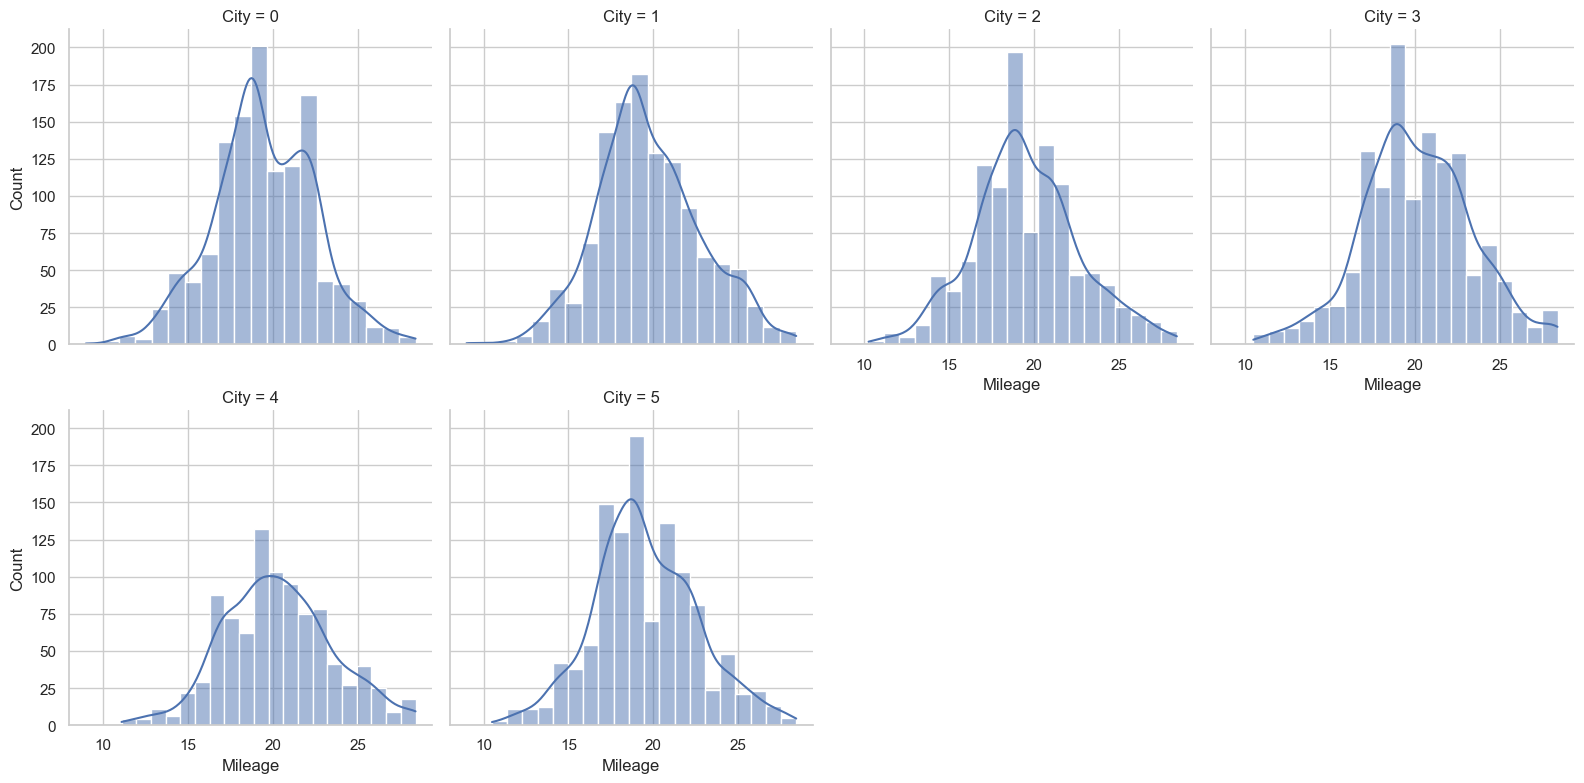

In [28]:
def plot_facet_grid(df, col):
    g = sns.FacetGrid(df, col=col, col_wrap=4, height=4)
    g.map(sns.histplot, 'Mileage', bins=20, kde=True)
    plt.show()

# Example facet grid for 'City'
plot_facet_grid(df, 'City')

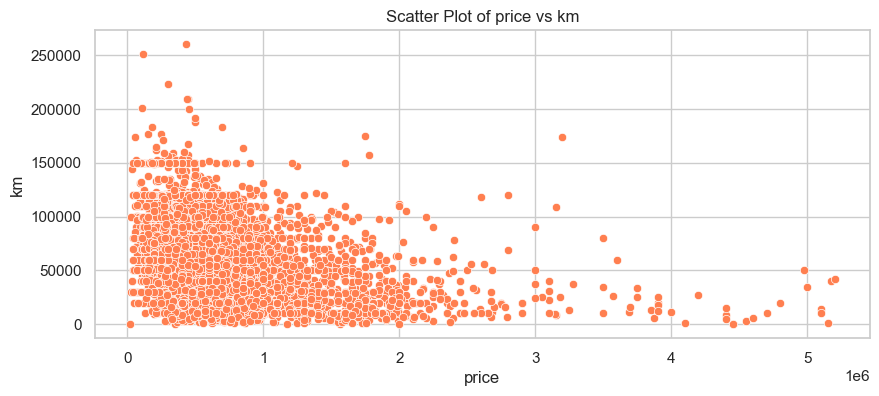

In [29]:
def plot_scatter(df, x_column, y_column):
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=df[x_column], y=df[y_column], color='coral')
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example scatter plot for 'price' vs 'km'
plot_scatter(df, 'price', 'km')

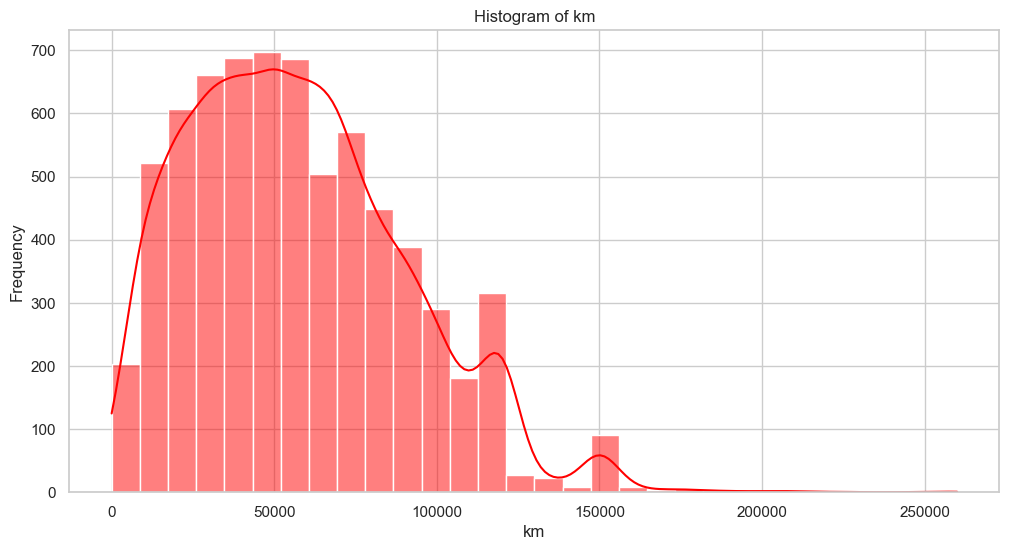

In [30]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column_name], bins=30, color='red', kde=True)  # You can adjust the number of bins
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example histogram for 'km'
plot_histogram(df, 'km')

In [31]:
df.head()

,ft,bt,km,transmission,ownerNo,oem,model,centralVariantId,variantName,price,Insurance Validity,Seats,RTO,Engine Displacement,Mileage,Max Power,Torque,Wheel Size,Color,Engine Type,Max Power_rpm,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Supply System,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Alloy Wheel Size,No of Doors,Cargo Volume,City,Car_age
0,4,0,120000,1,3,17,116,3979,1320,400000,5,5,137,2,23.10,67.04,90.00,15,17,201,6000,3500,3,4,1,11,3715,1635,1565,2425,1420,1410,835,1250,2,5,3,4.7,5,3,150.0,15.05,3,15,5,400,0,9
1,4,3,32706,1,2,6,31,6087,265,811000,3,5,107,4,17.00,121.31,150.00,16,17,280,6500,4500,3,4,1,2,3998,1765,1647,2519,1485,1500,1050,1500,2,5,3,5.3,5,3,170.0,13.00,3,15,5,400,0,6
2,4,0,11949,1,1,25,198,2983,114,585000,3,5,105,3,23.84,84.00,114.00,14,13,253,6000,3500,3,4,1,11,3746,1647,1535,2400,1400,1420,1012,1500,2,5,3,4.9,1,3,150.0,14.30,2,14,5,242,0,6
3,4,4,17794,1,1,9,67,1867,87,462000,3,5,139,1,19.10,81.86,113.75,14,11,228,6000,4000,4,4,1,2,3995,1660,1520,2425,1479,1493,1180,1500,2,5,3,4.7,1,3,172.0,14.20,3,14,4,407,0,10
4,1,3,60000,1,1,17,134,4277,663,790000,5,5,106,5,23.65,88.50,200.00,16,8,152,4000,1750,4,4,1,11,4300,1785,1595,2600,1485,1500,1050,1500,2,5,3,5.2,5,6,190.0,12.00,3,16,5,353,0,9


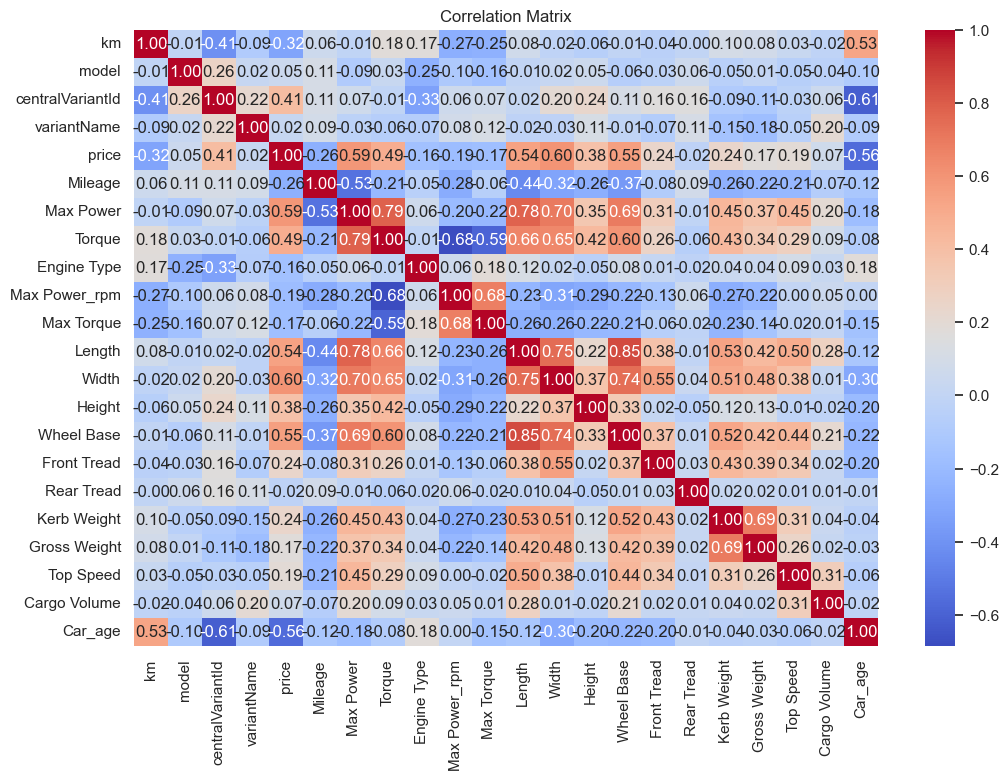

In [32]:
# Define the list of numerical columns
num_col = ['km', 'model', 'centralVariantId', 'variantName', 'price','Mileage', 'Max Power', 'Torque', 
           'Engine Type', 'Max Power_rpm', 'Max Torque', 'Length', 'Width', 'Height', 'Wheel Base', 
           'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight', 'Top Speed', 'Cargo Volume', 'Car_age']

# Filter DataFrame to include only numerical columns
df_num = df[num_col]

# Compute the correlation matrix
corr_matrix = df_num.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

# List all columns of non-object types
non_object_columns = df.select_dtypes(exclude="object").columns

# Exclude the 'price' column if it is present
columns_excluding_price = [col for col in non_object_columns if col != 'price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
for j in columns_excluding_price:
    df[[j]] = scaler.fit_transform(df[[j]])

In [34]:
# Separate features and target variable
x = df.drop(['price'], axis=1)
y = df['price']

# Compute correlation of each feature with the target variable
corr_target = df.corr()['price'].abs()

# Define a function to select features based on correlation with the target variable
def select_features_by_correlation(corr_series, threshold):
    return corr_series[corr_series > threshold].index.tolist()

# Set the correlation threshold
corr_threshold = 0.05

# Select features based on the correlation threshold (excluding 'price')
selected_features = [feature for feature in select_features_by_correlation(corr_target, corr_threshold) if feature != 'price']

# Add 'price' to the list of selected features
selected_features.append('price')

# Create a DataFrame with selected features
x_selected = df.loc[:, selected_features]

In [35]:
import pandas as pd
import os

# Assume `x_selected` is your DataFrame that you want to save
# Example DataFrame (replace this with your actual DataFrame):
# x_selected = pd.DataFrame({'Column1': [1, 2], 'Column2': ['A', 'B']})

# Define the output path for the CSV file
output_path = "C:\\Users\\Home\\Car_dekho\\Car_Dheko\\final_cleaned_car_dheko.csv"

# Ensure the directory exists
output_directory = os.path.dirname(output_path)
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Save the DataFrame to a CSV file
try:
    x_selected.to_csv(output_path, index=False)  # Save the DataFrame to the specified path
    print(f"File saved at: {output_path}")
except Exception as e:
    print(f"Error saving the file: {e}")


File saved at: C:\Users\Home\Car_dekho\Car_Dheko\final_cleaned_car_dheko.csv
